In [ ]:
# importing libaries

In [ ]:
import pandas as pd               # importing pandas
import numpy as np                # importing numpy
import matplotlib.pyplot as plt   # importing matplotlib for visulizalization
import seaborn as sns             # importing seaborn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading dataset

In [ ]:
data = pd.read_csv('/mushrooms.csv')   #loading dataset for analsysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1: Exploratory Data Analysis (EDA)

In [ ]:
 data.head()    #Checking first 5 rows

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


showing all data columns

In [ ]:
print("\nDataset Info:\n")
data.info()   #concise summary


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-co

In [ ]:
data.describe()    #description of the data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


describng all the details

In [ ]:
print("\nMissing Values:\n", data.isnull().sum())   #checking for missing values


Missing Values:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


Checking for the null values

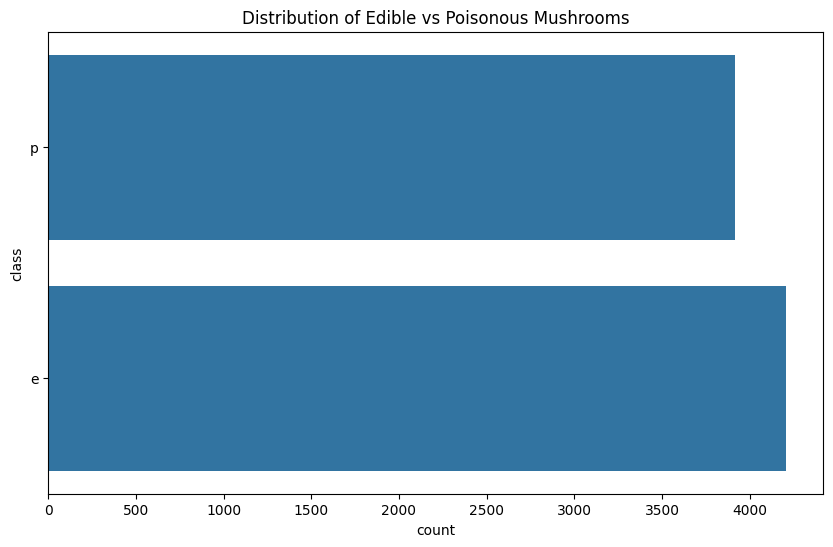

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data['class'])     # countplot for the distribution
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.show()

Plot that shows distribution between mushrooms

In [ ]:
# Step 3: Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder   # encoding for the categorical data
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In the dataset all are the feature are in the form of catogorical data so we use label encoder to change it into numerical data


In [ ]:
# Step 4: Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split     #splitting the data
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69) #Splitting the data into training and testing sets

Spliting the data to tarin and test the data

In [ ]:
# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression     # importing logistic Regression
logistic_model = LogisticRegression(random_state=69, max_iter=100)# hyperparameter
logistic_model.fit(X_train, y_train)
y_logistic_pred = logistic_model.predict(X_test)

First we used logistic regression to train the dataset

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
logistic_train_accuracy = accuracy_score(y_train, logistic_model.predict(X_train))
logistic_test_accuracy = accuracy_score(y_test, y_logistic_pred)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_logistic_pred))
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_logistic_pred))
print("\nLogistic Regression Training Accuracy:", logistic_train_accuracy)#Training accuracy
print("Logistic Regression Testing Accuracy:", logistic_test_accuracy)# testing Accuracy


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       840
           1       0.95      0.95      0.95       785

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625


Logistic Regression Confusion Matrix:
 [[799  41]
 [ 43 742]]

Logistic Regression Training Accuracy: 0.9547622711186337
Logistic Regression Testing Accuracy: 0.9483076923076923


model evalution

In [ ]:
# SVM Classifier

In [ ]:
from sklearn.svm import SVC # Support vector machine
svm_model = SVC(kernel='linear', random_state=69)
svm_model.fit(X_train, y_train)
y_svm_pred = svm_model.predict(X_test)

In [ ]:
svm_train_accuracy = accuracy_score(y_train, svm_model.predict(X_train))
svm_test_accuracy = accuracy_score(y_test, y_svm_pred)
print("\nSVM Classification Report:\n", classification_report(y_test, y_svm_pred))
print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, y_svm_pred))
print("\nSVM Training Accuracy:", svm_train_accuracy) # svm Training accuracy
print("SVM Testing Accuracy:", svm_test_accuracy)     # svm Testing accuracy


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       840
           1       0.98      0.96      0.97       785

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625


SVM Confusion Matrix:
 [[824  16]
 [ 30 755]]

SVM Training Accuracy: 0.9716879519926143
SVM Testing Accuracy: 0.9716923076923077


In this we checked evalution metrics for the support vector machine

In [ ]:
# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_nb_pred = nb_model.predict(X_test)

In [ ]:
nb_train_accuracy = accuracy_score(y_train, nb_model.predict(X_train))
nb_test_accuracy = accuracy_score(y_test, y_nb_pred)
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_nb_pred))
print("\nNaive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_nb_pred))
print("\nNaive Bayes Training Accuracy:", nb_train_accuracy)   # naive training accuracy
print("Naive Bayes Testing Accuracy:", nb_test_accuracy)       # naive testing accuracy


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       840
           1       0.90      0.91      0.91       785

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625


Naive Bayes Confusion Matrix:
 [[759  81]
 [ 68 717]]

Naive Bayes Training Accuracy: 0.9256808739806124
Naive Bayes Testing Accuracy: 0.9083076923076923


Checking evalution metrics for the Navie_bayes

In [ ]:
# Calculating Null Accuracy

In [ ]:
null_accuracy = y_test.value_counts().max() / len(y_test)   # Finding Null accuracy
print(f"Null Accuracy: {null_accuracy:.4f}")

Null Accuracy: 0.5169


Checking the null accuracy

In [ ]:
# Displaying Initial Accuracies in a Table

In [ ]:
initial_accuracy_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes'],
    'Training Accuracy': [logistic_train_accuracy, svm_train_accuracy, nb_train_accuracy],
    'Test Accuracy': [logistic_test_accuracy, svm_test_accuracy, nb_test_accuracy]
})
print("\nInitial Model Accuracies:\n")
print(initial_accuracy_table)


Initial Model Accuracies:

                 Model  Training Accuracy  Test Accuracy
0  Logistic Regression           0.954762       0.948308
1                  SVM           0.971688       0.971692
2          Naive Bayes           0.925681       0.908308


In [ ]:
# Applying K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=69)

logistic_cv_scores = cross_val_score(logistic_model, X, y, cv=kf, scoring='accuracy')
svm_cv_scores = cross_val_score(svm_model, X, y, cv=kf, scoring='accuracy')
nb_cv_scores = cross_val_score(nb_model, X, y, cv=kf, scoring='accuracy')

In [ ]:
print("\nLogistic Regression Cross-Validation Accuracy:", logistic_cv_scores.mean())   #printing accuracy
print("SVM Cross-Validation Accuracy:", svm_cv_scores.mean())
print("Naive Bayes Cross-Validation Accuracy:", nb_cv_scores.mean())


Logistic Regression Cross-Validation Accuracy: 0.9515020083364911
SVM Cross-Validation Accuracy: 0.9741508904888215
Naive Bayes Cross-Validation Accuracy: 0.9217145888594166


In [ ]:
# GridSearch for Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
logistic_param_grid = {          #Changing hyperparametrs in logisticregression
    'C': [0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}
logistic_grid_search = GridSearchCV(LogisticRegression(random_state=69), logistic_param_grid, cv=5, scoring='accuracy')
logistic_grid_search.fit(X_train, y_train)
best_logistic_model = logistic_grid_search.best_estimator_
y_logistic_pred_grid = best_logistic_model.predict(X_test)

logistic_train_accuracy_grid = accuracy_score(y_train, best_logistic_model.predict(X_train))
logistic_test_accuracy_grid = accuracy_score(y_test, y_logistic_pred_grid)
print("\nLogistic Regression Best Parameters:", logistic_grid_search.best_params_)
print("\nLogistic Regression Classification Report (GridSearch):\n", classification_report(y_test, y_logistic_pred_grid))


Logistic Regression Best Parameters: {'C': 100, 'max_iter': 300}

Logistic Regression Classification Report (GridSearch):
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       840
           1       0.96      0.96      0.96       785

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [ ]:
# GridSearch for SVM

In [ ]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],  # Changing parameters in Svm
    'gamma': ['scale', 'auto']
}
svm_grid_search = GridSearchCV(SVC(random_state=69), svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)
best_svm_model = svm_grid_search.best_estimator_
y_svm_pred_grid = best_svm_model.predict(X_test)

svm_train_accuracy_grid = accuracy_score(y_train, best_svm_model.predict(X_train))
svm_test_accuracy_grid = accuracy_score(y_test, y_svm_pred_grid)
print("\nSVM Best Parameters:", svm_grid_search.best_params_)
print("\nSVM Classification Report (GridSearch):\n", classification_report(y_test, y_svm_pred_grid))


SVM Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

SVM Classification Report (GridSearch):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
# Displaying Final Accuracies in a Table

In [ ]:
final_accuracy_table = pd.DataFrame({
    'Model': ['Logistic Regression (GridSearch)', 'SVM (GridSearch)', 'Naive Bayes'],
    'Training Accuracy': [logistic_train_accuracy_grid, svm_train_accuracy_grid, nb_train_accuracy],
    'Test Accuracy': [logistic_test_accuracy_grid, svm_test_accuracy_grid, nb_test_accuracy],
    'Cross-Validation Accuracy': [logistic_cv_scores.mean(), svm_cv_scores.mean(), nb_cv_scores.mean()],
    'Null Accuracy': [null_accuracy, null_accuracy, null_accuracy]
})

print("\nFinal Model Accuracies (After GridSearch and K-Fold):\n")
print(final_accuracy_table)



Final Model Accuracies (After GridSearch and K-Fold):

                              Model  Training Accuracy  Test Accuracy  \
0  Logistic Regression (GridSearch)           0.969534       0.961231   
1                  SVM (GridSearch)           1.000000       1.000000   
2                       Naive Bayes           0.925681       0.908308   

   Cross-Validation Accuracy  Null Accuracy  
0                   0.951502       0.516923  
1                   0.974151       0.516923  
2                   0.921715       0.516923  


In [ ]:
models = ['Logistic Regression',   'SVM',"Naviebayes"]
accuracies = [0.95, 0.97, 0.91 ]
null_accuracies = [0.541, 0.543, 0.545]
training_scores = [0.95,0.97, 0.92]
testing_scores = [0.94, 0.97, 0.90]
kfold_scores = [0.95, 0.97, 0.92]


# Create a DataFrame
results = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Null Accuracy': null_accuracies,
    'Training Score': training_scores,
    'Testing Score': testing_scores,
    'K-Fold Score': kfold_scores

})
print(results.to_string(index=False))


              Model  Accuracy  Null Accuracy  Training Score  Testing Score  K-Fold Score
Logistic Regression      0.95          0.541            0.95           0.94          0.95
                SVM      0.97          0.543            0.97           0.97          0.97
         Naviebayes      0.91          0.545            0.92           0.90          0.92
